In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from rainman2 import RAINMAN2

Using TensorFlow backend.


Rainman2's logging has been configured!



#### Normal case: Start with 30% Random actions (explore) and rest 70% fetch max actions (exploit)


In [3]:
# Server profile: num_ues=200, APs=16, Scale=200.0, explore_radius=1
from collections import OrderedDict
ALGORITHM_CONFIG = OrderedDict(
    EPISODES=400,
    ALPHA=0.2,
    GAMMA=0.9,
    EPSILON=0.3,
    EPSILON_DECAY=0.99,
    EPSILON_MIN=0.01,
    VERBOSE=True,
    L1_HIDDEN_UNITS=13,
    L2_HIDDEN_UNITS=13,
    L1_ACTIVATION='relu',
    L2_ACTIVATION='relu',
    LOSS_FUNCTION='mean_squared_error',
    OPTIMIZER='Adam',
)

CELLULAR_MODEL_CONFIG = OrderedDict(
    NAME='Cellular',
    TYPE='Dev',
    SERVER='0.0.0.0',
    SERVER_PORT='8000',
    VERBOSE=True,
)


In [4]:
RAINMAN2.algorithm_config = ALGORITHM_CONFIG
RAINMAN2.environment_config = CELLULAR_MODEL_CONFIG

In [5]:
result = RAINMAN2.run_experiment("Cellular", "Qlearning", "Naive")

2018-04-17 12:42:01,772 Aris-MacBook-Pro.local Rainman2[43670] INFO Starting experiment!
2018-04-17 12:42:01,774 Aris-MacBook-Pro.local Rainman2[43670] INFO Building Environment instance: Cellular
2018-04-17 12:42:01,775 Aris-MacBook-Pro.local rainman2.lib.environment.cellular.base[43670] INFO Instantiating Cellular client: Dev
2018-04-17 12:42:01,776 Aris-MacBook-Pro.local QCellularAgent[43670] INFO Configuration used for the QCellular Agent:
2018-04-17 12:42:01,778 Aris-MacBook-Pro.local QCellularAgent[43670] INFO episodes: 400
2018-04-17 12:42:01,779 Aris-MacBook-Pro.local QCellularAgent[43670] INFO alpha: 0.2
2018-04-17 12:42:01,780 Aris-MacBook-Pro.local QCellularAgent[43670] INFO gamma: 0.9
2018-04-17 12:42:01,781 Aris-MacBook-Pro.local QCellularAgent[43670] INFO epsilon: 0.3
2018-04-17 12:42:01,782 Aris-MacBook-Pro.local QCellularAgent[43670] INFO epsilon_decay: 0.99
2018-04-17 12:42:01,783 Aris-MacBook-Pro.local QCellularAgent[43670] INFO epsilon_min: 0.01
2018-04-17 12:42:01,7

Module: run_experiment took: 192.768702s


[========================================================================] 100%


In [6]:
print("Number of states encountered: {}".format(len(result.Q)))

Number of states encountered: 2657


In [7]:
print("Number of q_ap_states encountered: {}".format(len(result.Q_ap)))

Number of q_ap_states encountered: 752


In [ ]:
print(result.Q)

In [ ]:
print(result.Q_ap)

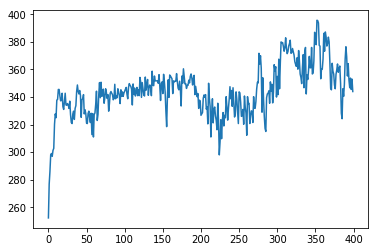

In [8]:
plt.plot(result.Rewards)

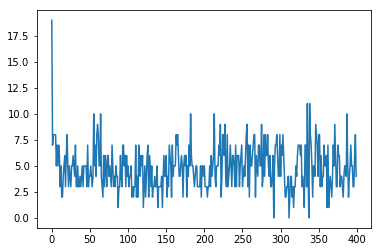

In [9]:
plt.plot(result.Handoffs)

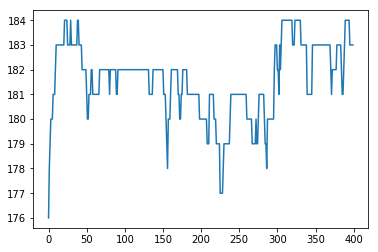

In [10]:
plt.plot(result.Meets_SLA)